<a href="https://colab.research.google.com/github/Quantum-SMC/Private-Computation-of-Boolean-Functions-Using-Single-Qubits/blob/main/equivalance_quantum_smc_protocol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing requirements

In [ ]:
!pip install qiskit==0.43.2
!pip install qiskit[visualization]==0.43.2
!pip install qiskit-aer==0.12.1

In [ ]:
from qiskit import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

import numpy as np

import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from qiskit import transpile, assemble

from math import sqrt, pi, exp
from qiskit import Aer, execute
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.visualization import plot_bloch_vector
from qiskit.result import marginal_counts

Implementation of a new Secure Multipary Computation (SMC) protocol to compute symmetric Boolean functions of degree 2.

In the following the 2-bit Equivalence function of Alice's and Bob's private input is computed.

In [ ]:
# Private inputs of Alice and Bob
a1 = 1
a2 = 1
b1 = 1
b2 = 1
r = [1, 1, 1, 1]  # random bits that are shared between Alice and Bob.

In [ ]:
# Polynomials to compute Equivalence fuction
P = [
    1^a1^a2^(a1&a2),
    1,
    1^a2,
    1^a1
]
Q = [
    1,
    b1&b2,
    b1,
    b2
]

In [ ]:
# constants
final_outcome = []
counts_list = []
colors = ['r', 'g', 'b', 'y']

First we run the protocol in a ideal setting where all quantum noise are ignored.

In [ ]:
# New SMC protocol to compute Boolean functions of degree 2
for i in range(0, 4):

    # Create a quantum circuit
    q = QuantumRegister(1)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q, c)

    # Alice rotates the qubit based on inputs r and a
    if r[i] == 1:
        qc.ry(pi, q[0])

    if P[i] == 1:
        qc.ry(pi/2, q[0])


    # Bob rotates the qubit based on inputs r and b
    if r[i] == 1:
        qc.ry(pi, q[0])

    if Q[i] == 1:
        qc.ry(pi/2, q[0])

    # Charlie rotates the qubit based on input XOR(a,b)
    if P[i] ^ Q[i] == 1:
        qc.ry(-pi/2, q[0])

    # Charlie measures the qubit in computational basis
    qc.measure(q[0], c[0])

    #visualization
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=100)
    result = job.result().get_counts()
    print(result)
    counts_list.append(result)
    #plot_histogram(result).savefig(f'histogram_iteration_{i}.png')

    # Extract the outcome from classical register
    c_values = [int(bit) for bit in list(result.keys())[0]]
    print("The measurement outcomes in round", i, "is: ", c_values[0])
    final_outcome.append(c_values[0])

print("counts_list", counts_list)
print("The final outcomes is: ", final_outcome[0] ^ final_outcome[1] ^ final_outcome[2] ^ final_outcome[3])

{'0': 100}
The measurement outcomes in round 0 is:  0
{'1': 100}
The measurement outcomes in round 1 is:  1
{'0': 100}
The measurement outcomes in round 2 is:  0
{'0': 100}
The measurement outcomes in round 3 is:  0
counts_list [{'0': 100}, {'1': 100}, {'0': 100}, {'0': 100}, {'0': 100}, {'1': 100}, {'0': 100}, {'0': 100}, {'0': 100}, {'1': 100}, {'0': 100}, {'0': 100}, {'0': 100}, {'1': 100}, {'0': 100}, {'0': 100}, {'0': 100}, {'1': 100}, {'0': 100}, {'0': 100}]
The final outcomes is:  1


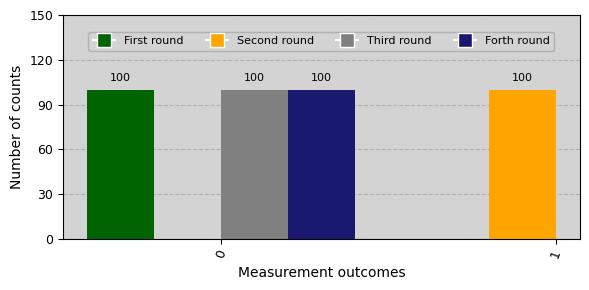

In [ ]:
# Visualization of all rounds in a single diagram

# Create a new matplotlib figure and Axes object
fig, ax = plt.subplots(figsize=(6, 3))


legends = ['First round', 'Second round', 'Third round', 'Forth round']
colors=['darkgreen', 'orange', 'gray', 'midnightblue']
plot_histogram(counts_list, figsize=(10, 4), color=colors, bar_labels=False, ax=ax)

plt.xlabel("Measurement outcomes", fontsize=10)
plt.ylabel("Number of counts", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Customizing the legend
legend_labels = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in colors]
legend = plt.legend(legend_labels, legends, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=len(legends) , fontsize=8)
# Increase the y-axis limit
ax.set_ylim(0, 150)  # Set the desired limit here

# Set the background color
ax.set_facecolor('#D3D3D3')

# Set the background color of the legend
legend.get_frame().set_facecolor('lightgray')
legend.get_frame().set_edgecolor('darkgray')

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(height, (rect.get_x() + rect.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8,
                xytext=(0, 5), textcoords='offset points')

# Adjust the positioning of the plot within the figure
plt.tight_layout()
plt.savefig('histogram.png')



Now, we execute the protocol considering different quantum noise.

In [ ]:
# New SMC protocol to compute binary Boolean functions

# constants
final_outcome = []
counts_list = []
colors = ['r', 'g', 'b', 'y']

# Error probabilities
p_bit_flip = 0.05
p_phase_flip = 0.05
p_amplitude_damping = 0.05
p_phase_damping = 0.05
p_depolarization = 0.05


for i in range(0, 4):

    # Create a quantum circuit
    q = QuantumRegister(1)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q, c)

    # Alice rotates the qubit based on inputs r and a
    if r[i] == 1:
        qc.ry(pi, q[0])

    if P[i] == 1:
        qc.ry(pi/2, q[0])


    # Bob rotates the qubit based on inputs r and b
    if r[i] == 1:
        qc.ry(pi, q[0])

    if Q[i] == 1:
        qc.ry(pi/2, q[0])

    # Charlie rotates the qubit based on input XOR(a,b)
    if P[i] ^ Q[i] == 1:
        qc.ry(-pi/2, q[0])

    # Charlie measures the qubit in computational basis
    qc.measure(q[0], c[0])


    # QuantumError objects -> gate error
    error_bit_flip = pauli_error([('X', p_bit_flip), ('I', 1 - p_bit_flip)])
    error_phase_flip = pauli_error([('Z', p_phase_flip), ('I', 1 - p_phase_flip)])
    error_amplitude_damping = amplitude_damping_error(p_amplitude_damping)
    error_phase_damping = phase_damping_error(p_phase_damping)
    error_depolarization = depolarizing_error(p_depolarization, 1)

    ################## Add errors to noise model ##################
    # Create an empty noise model
    noise_model = NoiseModel()

    # Compose errors for gates
    gate_errors = error_bit_flip.compose(error_phase_flip).compose(error_amplitude_damping).compose(error_phase_damping).compose(error_depolarization)
    noise_model.add_all_qubit_quantum_error(gate_errors, ["ry"])

    # Compose errors for measurements
    measurement_errors = error_bit_flip.compose(error_amplitude_damping)
    noise_model.add_all_qubit_quantum_error(measurement_errors, ["measure"])


    ################## Executing the noisy simulation ##################
    # Create noisy simulator backend
    sim_noise = AerSimulator(noise_model=noise_model)

    # Transpile circuit for noisy basis gates
    qc_tnoise = transpile(qc, sim_noise)

    # Run the circuit with noise model and get counts
    result = sim_noise.run(qc_tnoise, shots=1000).result()
    counts = result.get_counts()

    # Plot noisy output
    # plot_histogram(counts)

    # Print and store the counts
    print(counts)
    counts_list.append(counts)

    # Extract the outcome from counts
    max_outcome = max(counts, key=counts.get)
    print("The measurement outcome in round", i, "is:", max_outcome)
    final_outcome.append(int(max_outcome))

print("counts_lists", counts_list)

# Compute the final XOR outcome
final_xor = final_outcome[0] ^ final_outcome[1] ^ final_outcome[2] ^ final_outcome[3]
print("The final XOR outcome is:", final_xor)


In [ ]:
# Visualization of all rounds in a single diagram
# Create a new matplotlib figure and Axes object
fig, ax = plt.subplots(figsize=(10, 4))

# Legends and colors for each round
legends = ['First round', 'Second round', 'Third round', 'Fourth round']
colors = ['darkgreen', 'orange', 'gray', 'midnightblue']

# Plot histogram for all counts in a single diagram
plot_histogram(counts_list, figsize=(10, 4), color=colors, bar_labels=False, ax=ax)

# Customize plot labels
plt.xlabel("Measurement outcomes", fontsize=10)
plt.ylabel("Number of counts", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Customizing the legend
legend_labels = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in colors]
legend = plt.legend(legend_labels, legends, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=len(legends), fontsize=8)

# Increase the y-axis limit
ax.set_ylim(0, 1200)  # Set the desired limit here

# Set the background color
ax.set_facecolor('#D3D3D3')

# Set the background color of the legend
legend.get_frame().set_facecolor('lightgray')
legend.get_frame().set_edgecolor('darkgray')

# Annotate the bars with the height value
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(height, (rect.get_x() + rect.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8,
                xytext=(0, 5), textcoords='offset points')

# Adjust the positioning of the plot within the figure
plt.tight_layout()

# Save the figure
plt.savefig('histogram.png')

This part is only to draw the circuit. This version of the qiskit can not draw the circuit when looping is used.


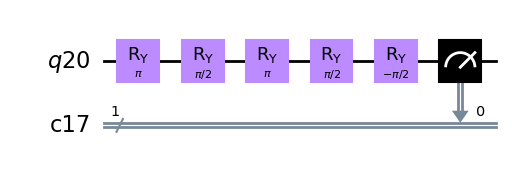

In [ ]:
# Polynomials to compute Equivalence fuction
P = [
    1,
    1,
    1,
    1
]
Q = [
    1,
    1,
    1,
    1
]
r = [1, 1, 1, 1]
# Create a quantum circuit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

# Alice rotates the qubit based on inputs r and a
if r[0] == 1:
  qc.ry(pi, q[0])

if P[0] == 1:
  qc.ry(pi/2, q[0])


# Bob rotates the qubit based on inputs r and b
if r[0] == 1:
  qc.ry(pi, q[0])

if Q[0] == 1:
  qc.ry(pi/2, q[0])

# Charlie rotates the qubit based on input XOR(a,b)
if 1 == 1:
  qc.ry(-pi/2, q[0])

# Charlie measures the qubit in computational basis
qc.measure(q[0], c[0])
qc.draw(output='mpl')